In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Assignment 2/diabetes.csv')
# df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')

Mounted at /content/drive


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
DF = pd.DataFrame (df)
DF
X = pd.DataFrame (df , columns = ['Glucose' , 'BloodPressure' , 'SkinThickness' , 'Insulin' , 'BMI' , 'DiabetesPedigreeFunction' , 'Age']).values
y =DF.Outcome.values.reshape (-1,1)
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.3 , random_state = 0)

In [ ]:
k=5
clf = KNeighborsClassifier (k)
clf.fit (X_train , y_train.ravel ())
y_pred = clf.predict(X_test)

In [ ]:
print ('Accuracy:' , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.7445887445887446


In [ ]:
k=3
clf = KNeighborsClassifier (k)
clf.fit (X_train , y_train.ravel ())
y_pred = clf.predict(X_test)

In [ ]:
print ('Accuracy:' , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.70995670995671


In [ ]:
k=9
clf = KNeighborsClassifier (k)
clf.fit (X_train , y_train.ravel ())
y_pred = clf.predict(X_test)

In [ ]:
print ('Accuracy:' , metrics.accuracy_score(y_test , y_pred))

Accuracy: 0.7532467532467533


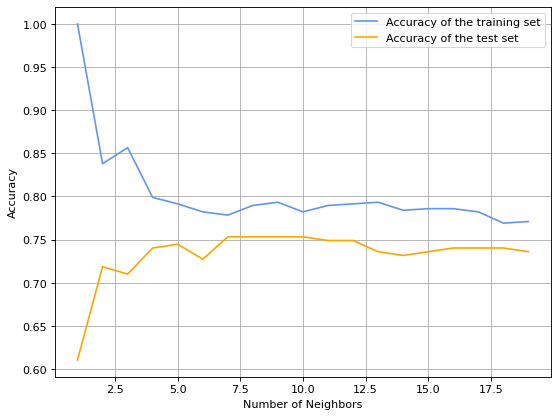

In [ ]:
training_acc = []
test_acc = []
neighbors_setting = range (1,20)
for n_neighbors in neighbors_setting :
    knn = KNeighborsClassifier (n_neighbors = n_neighbors)
    knn.fit (X_train , y_train.ravel ())
    training_acc.append (knn.score (X_train , y_train))
    test_acc .append (knn.score (X_test , y_test))
plt.figure (figsize = (8,6) , dpi = 80)
plt.plot(neighbors_setting , training_acc , label = 'Accuracy of the training set' ,  color = 'cornflowerblue')
plt.plot(neighbors_setting , test_acc , label = 'Accuracy of the test set' , color = 'orange')
plt.xlabel ('Number of Neighbors')
plt.ylabel ('Accuracy')
plt.legend()
plt.grid()
plt.show ()